In [20]:
import os
import glob
import json
import tqdm

import numpy as np
import pandas as pd
import nibabel as nib

# 01 - General Description and some statistics of the Dataset

## 1.0 Generate csv file with basic information per image
 - voxel size
 - field of view
 - volume of aneurysm class

In [28]:
data_dir = '../../../../data/raw/USZ/'
image_fps = glob.glob(os.path.join(data_dir,'*', '*_seg.nii.gz'))

original_ids_to_num_ids = json.load(open('../id_conversion.json', 'r'))
num_ids_to_original_ids = {v: k for k, v in original_ids_to_num_ids.items()}

In [29]:
len(image_fps) 

62

In [66]:
train_idxs = os.listdir('../../../../data/nnUNet_raw/Dataset003_3Classes/labelsTr/')
train_idxs = [int(idx.split('.')[0]) for idx in train_idxs]
train_idxs

train_idxs_original = [num_ids_to_original_ids[idx] for idx in train_idxs]

In [76]:
aneurysm_label = 4
basic_desc = []
for img_fp in tqdm.tqdm(image_fps):
    image_name = os.path.basename(os.path.dirname(img_fp))
    print('processing image: ', image_name,  end='\r')
    
    # load nift image
    img = nib.load(img_fp)
    
    # Get voxel_size_in each dimension
    y_size, x_size, z_size = img.header.get_zooms()
    
    # Get field of view in each dimension
    y_fov = y_size * img.shape[0]
    x_fov = x_size * img.shape[1]
    z_fov = z_size * img.shape[2]
    
    # Volume of the aneurysm
    img_data = img.get_fdata()
    aneurysm_volume = np.sum(img_data == aneurysm_label) * y_size * x_size * z_size
    
    basic_desc.append(
        {
            'img_name': image_name,
            'y_size': y_size,
            'x_size': x_size,
            'z_size': z_size,
            'y_fov': y_fov,
            'x_fov': x_fov,
            'z_fov': z_fov,
            'aneurysm_volume': aneurysm_volume,
            'in_train': image_name in train_idxs_original,
        }
    )

  0%|          | 0/62 [00:00<?, ?it/s]

  3%|▎         | 2/62 [00:00<00:17,  3.41it/s]

  6%|▋         | 4/62 [00:00<00:13,  4.29it/s]

 10%|▉         | 6/62 [00:01<00:10,  5.31it/s]

 13%|█▎        | 8/62 [00:01<00:09,  5.58it/s]

 16%|█▌        | 10/62 [00:01<00:07,  6.82it/s]

 19%|█▉        | 12/62 [00:02<00:08,  5.87it/s]

 23%|██▎       | 14/62 [00:02<00:08,  5.40it/s]

 26%|██▌       | 16/62 [00:02<00:07,  6.20it/s]

 29%|██▉       | 18/62 [00:03<00:07,  5.60it/s]

 31%|███       | 19/62 [00:03<00:07,  5.52it/s]

 32%|███▏      | 20/62 [00:03<00:08,  5.24it/s]

 35%|███▌      | 22/62 [00:04<00:08,  4.78it/s]

 39%|███▊      | 24/62 [00:04<00:05,  6.47it/s]

 42%|████▏     | 26/62 [00:04<00:05,  6.57it/s]

 45%|████▌     | 28/62 [00:05<00:05,  6.13it/s]

 48%|████▊     | 30/62 [00:05<00:05,  5.96it/s]

 50%|█████     | 31/62 [00:05<00:05,  6.17it/s]

 53%|█████▎    | 33/62 [00:05<00:05,  5.45it/s]

 55%|█████▍    | 34/62 [00:06<00:04,  6.31it/s]

 58%|█████▊    | 36/62 [00:06<00:05,  4.71it/s]

 61%|██████▏   | 38/62 [00:06<00:04,  5.11it/s]

 65%|██████▍   | 40/62 [00:07<00:04,  5.23it/s]

 66%|██████▌   | 41/62 [00:07<00:04,  4.59it/s]

 69%|██████▉   | 43/62 [00:07<00:03,  5.59it/s]

 74%|███████▍  | 46/62 [00:08<00:02,  6.22it/s]

 77%|███████▋  | 48/62 [00:08<00:02,  5.97it/s]

 81%|████████  | 50/62 [00:08<00:01,  6.26it/s]

 82%|████████▏ | 51/62 [00:09<00:01,  6.78it/s]

 85%|████████▌ | 53/62 [00:09<00:01,  6.52it/s]

 87%|████████▋ | 54/62 [00:09<00:01,  5.72it/s]

 92%|█████████▏| 57/62 [00:10<00:00,  6.46it/s]

 95%|█████████▌| 59/62 [00:10<00:00,  6.56it/s]

 97%|█████████▋| 60/62 [00:10<00:00,  6.15it/s]

 98%|█████████▊| 61/62 [00:10<00:00,  5.11it/s]

100%|██████████| 62/62 [00:11<00:00,  5.60it/s]


In [102]:
basic_desc_df = pd.DataFrame(basic_desc).set_index('img_name')
basic_desc_df['total_fov'] = basic_desc_df[['y_fov', 'x_fov', 'z_fov']].agg(np.multiply.reduce, axis=1)
basic_desc_df.to_csv('basic_info_USZ_dataset.csv')

In [103]:
basic_desc_df.in_train.value_counts()

in_train
True     49
False    13
Name: count, dtype: int64

<Axes: >

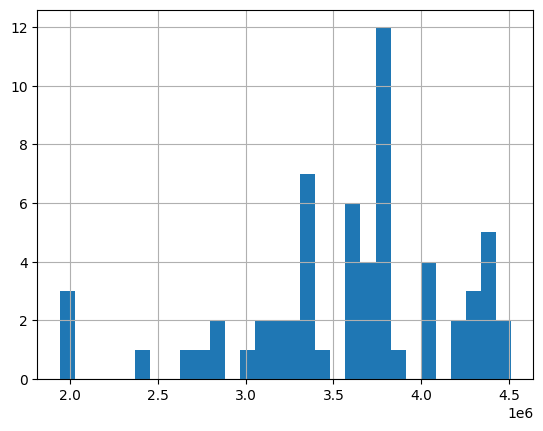

In [104]:
basic_desc_df[['y_fov', 'x_fov', 'z_fov']].agg(np.multiply.reduce, axis=1).hist(bins=30)

In [105]:
basic_desc_df.loc[basic_desc_df.in_train][['y_fov', 'x_fov', 'z_fov']].agg(np.multiply.reduce, axis=1).sort_values(ascending=False).head(10)

img_name
10102066_KA_AComm_Checked     4.400000e+06
10820130_MB_MirrorMCA         4.400000e+06
10019209_EK_MCA_Checked       4.399998e+06
10147148-AComm-NEW            4.399996e+06
10293987_HMR_AComm_Checked    4.319445e+06
10795693_BE_PCA_Checked       4.274688e+06
11047954_LM_Pericallosa       4.274688e+06
10745241-MCA-new              4.200000e+06
05481872-AComm-new            4.070430e+06
10600633-AComm-new-Colors     4.032777e+06
dtype: float64

In [106]:
idx_interest = basic_desc_df.loc[basic_desc_df.in_train][['y_fov', 'x_fov', 'z_fov']].agg(np.multiply.reduce, axis=1).sort_values(ascending=False).head(10).index

In [115]:
larges_fov_df = basic_desc_df.loc[idx_interest].sort_values('total_fov', ascending=False).head(15) 
larges_fov_df

,y_size,x_size,z_size,y_fov,x_fov,z_fov,aneurysm_volume,in_train,total_fov
img_name,,,,,,,,,
10102066_KA_AComm_Checked,0.312500,0.312500,0.550000,200.000000,200.000000,110.000002,331.933601,True,4.400000e+06
10820130_MB_MirrorMCA,0.312500,0.312500,0.550000,200.000000,200.000000,109.999990,300.082982,True,4.400000e+06
10019209_EK_MCA_Checked,0.312500,0.312500,0.550000,200.000000,200.000000,109.999955,131.538032,True,4.399998e+06
10147148-AComm-NEW,0.312500,0.312500,0.550000,200.000000,200.000000,109.999907,238.368939,True,4.399996e+06
10293987_HMR_AComm_Checked,0.390600,0.390600,0.600000,199.987198,199.987198,107.999961,96.758817,True,4.319445e+06
10795693_BE_PCA_Checked,0.343750,0.343750,0.600000,176.000000,220.000000,110.399993,89.757417,True,4.274688e+06
11047954_LM_Pericallosa,0.343750,0.343750,0.600000,176.000000,220.000000,110.399993,105.284173,True,4.274688e+06
10745241-MCA-new,0.312500,0.312500,0.600000,175.000000,200.000000,120.000005,167.343757,True,4.200000e+06
05481872-AComm-new,0.328125,0.328125,0.400000,170.625000,210.000000,113.600002,114.642775,True,4.070430e+06


In [116]:
smallest_aneurysms_df = basic_desc_df[basic_desc_df.in_train].sort_values('aneurysm_volume', ascending=True).head(15)
smallest_aneurysms_df

,y_size,x_size,z_size,y_fov,x_fov,z_fov,aneurysm_volume,in_train,total_fov
img_name,,,,,,,,,
04270916_VS_AComm_Checked,0.390625,0.390625,0.600000,200.000000,200.000000,67.200003,0.000000,True,2.688000e+06
10795198-BA-NEW_DONE,0.296875,0.296875,0.600000,166.250000,190.000000,120.000005,5.499610,True,3.790500e+06
10704331-AComm-NEW,0.390600,0.390600,0.700000,199.987198,199.987198,100.799998,25.311090,True,4.031484e+06
10576901_KJ_ICA_Checked,0.332000,0.332000,0.600001,169.983994,169.983994,67.200109,34.654479,True,1.941717e+06
10739823-PComm-links-NEW,0.296875,0.296875,0.600000,162.687500,190.000000,120.000005,41.828761,True,3.709275e+06
11089079_KA_MCA,0.286458,0.286458,0.650000,169.583322,219.999985,89.700005,51.897816,True,3.346557e+06
07767625_LJ_Pericallosa_Checked,0.296875,0.296875,0.600000,166.250000,190.000000,119.999993,60.918746,True,3.790500e+06
10599468-AComm-new,0.296875,0.296875,0.600000,166.250000,190.000000,120.000005,67.052932,True,3.790500e+06
10448252_BPE_ICA_Checked,0.296875,0.296875,0.600000,166.250000,190.000000,119.999993,72.869820,True,3.790500e+06


In [117]:
largest_z_fov_df = basic_desc_df[basic_desc_df.in_train].sort_values('z_fov', ascending=False).head(15)

In [118]:
# find overlap
set(larges_fov_df.index).intersection(set(smallest_aneurysms_df.index))

{'10600633-AComm-new-Colors'}

We can pick either "10745241-MCA-new" (decent FoV and very small aneurysm) and "10600633-AComm-new-Colors" (overlaps in top 15 largest field of views in total and in the z axis, while being in top 15 smallest aneurysms)

## 1.1 Distribution of UIAs location (per Vessel Type)

## 1.2 Distribution of UIAs location (per Vessel Type and territory)

## 1.3 Distribution of UIAs per size

### Per maximum diameter 

For example in ranges [0, 5mm), [5mm, 10mm), [10mm, inf)

### Per volume

### Per maximum median radius

## 1.4 Distribution of UIAs type (saccular or fusiform)